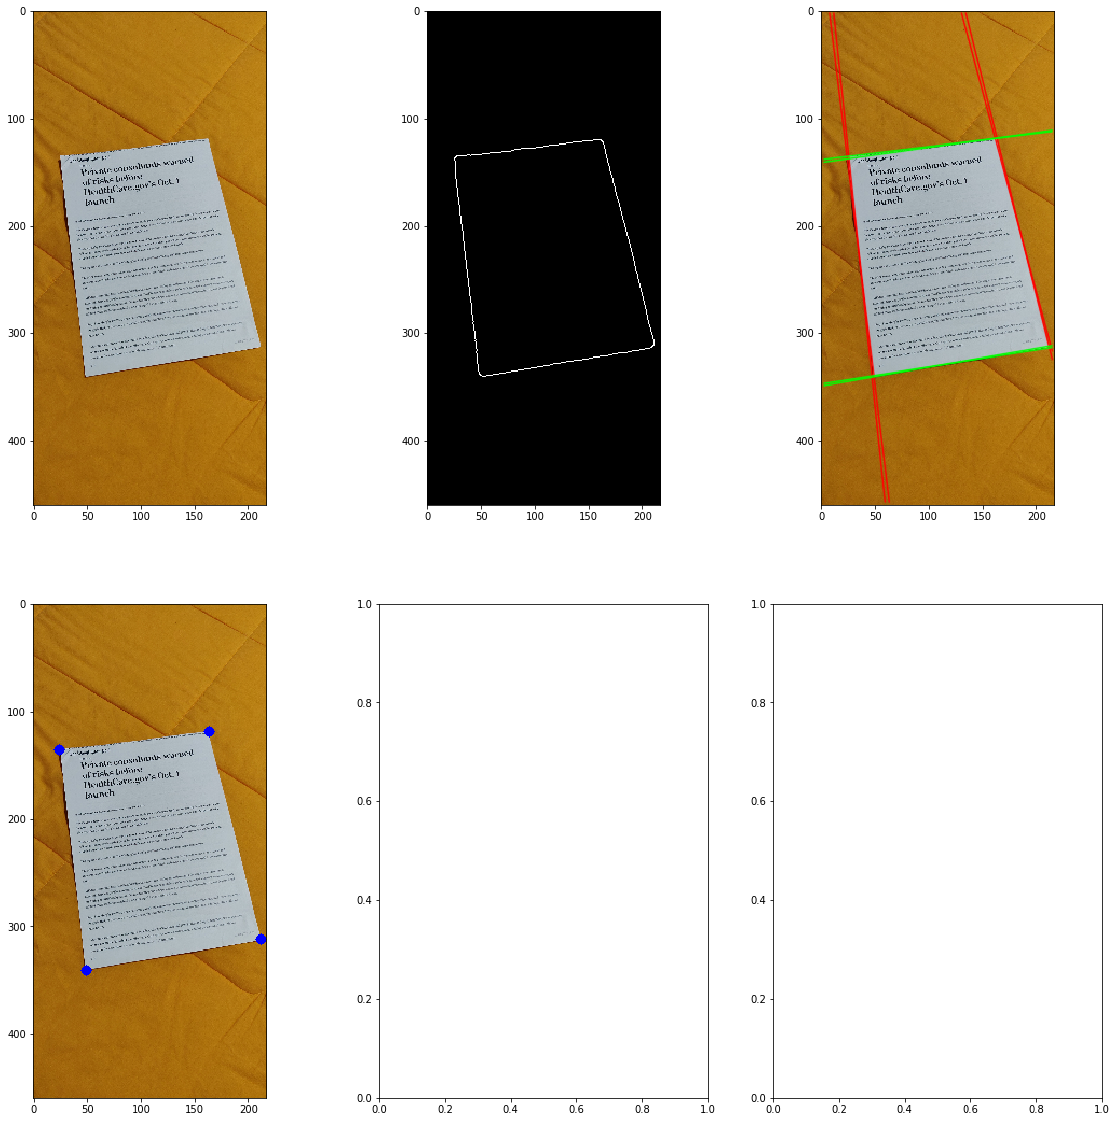

In [9]:
from matplotlib import pyplot as plt
import cv2
from koda import scan
import itertools
import time
import numpy as np

%matplotlib inline
fig, axes = plt.subplots(2, 3, figsize=(20, 20))

# Load image
filename = 'dataset/straight_page_over_orange_background.jpg'
image = cv2.imread(filename)

# Scale down to make operations faster
perc = 10
resized = cv2.resize(image, (image.shape[1]*perc//100, image.shape[0]*perc//100))
axes[0][0].imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

# Edges
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 7)
edges = cv2.Canny(gray, threshold1=150, threshold2=170)
axes[0][1].imshow(cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB))

# Find corners
corners, lines = scan.detect_corners(edges, 70)

# Show Hough lines
im_lines = resized.copy()
color = [(0,0,255), (0,255,0)]
for i, lines in enumerate(lines):
    for rho, theta in lines:
        x = np.cos(theta)
        y = np.sin(theta)
        x0, y0 = x*rho, y*rho
        pt1 = ( int(x0+1000*(-y)), int(y0+1000*(x)) )
        pt2 = ( int(x0-1000*(-y)), int(y0-1000*(x)) )
        cv2.line(im_lines, pt1, pt2, color[i], 1, cv2.LINE_AA)
        
axes[0][2].imshow(cv2.cvtColor(im_lines, cv2.COLOR_BGR2RGB))

# Show corners
im_corners = resized.copy()
for x,y in corners:
    cv2.circle(im_corners, (x,y), 2, (255, 0, 0), 6)
axes[1][0].imshow(cv2.cvtColor(im_corners, cv2.COLOR_BGR2RGB))

plt.show()